In [1]:
import pandas as pd
import numpy as np

# Seed the random number generator
np.random.seed(42)


In [2]:
df = pd.read_csv('data.csv')

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

X = df.drop('species', axis=1)
Y = df['species']

In [3]:
# Normalize the data
# X = (X - X.mean()) / X.std()
# NOTE: Normalization actually makes the model perform worse

# Convert Y to integers
Y = Y.replace('setosa', 0)
Y = Y.replace('versicolor', 1)
Y = Y.replace('virginica', 2)

In [4]:
X_test, X_train = X[:30], X[30:]
Y_test, Y_train = Y[:30], Y[30:]

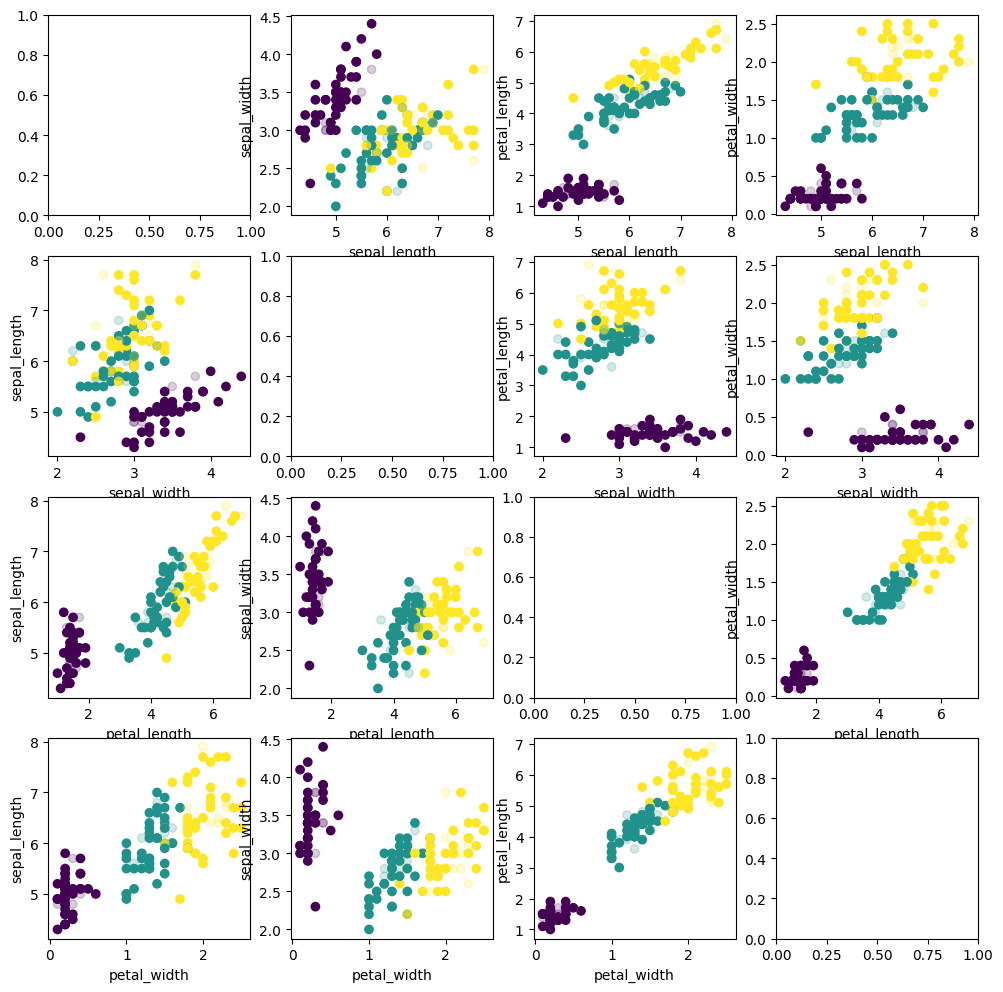

In [5]:
# Plot the data
# Always two features, color by species
import matplotlib.pyplot as plt

# in a grid of 4x4
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for i in range(4):
    for j in range(4):
        if i != j:
            axs[i, j].scatter(X_train.iloc[:, i], X_train.iloc[:, j], c=Y_train, cmap='viridis')
            # also add the test data but with lower opacity
            axs[i, j].scatter(X_test.iloc[:, i], X_test.iloc[:, j], c=Y_test, cmap='viridis', alpha=0.2)
            
            axs[i, j].set_xlabel(X_train.columns[i])
            axs[i, j].set_ylabel(X_train.columns[j])
            
plt.show()

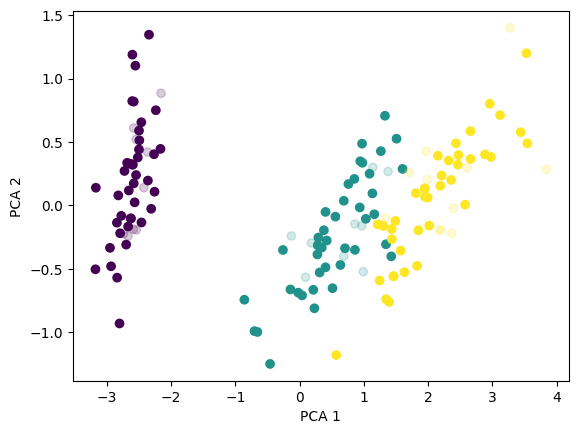

In [6]:
# Lets perform pca on the features to reduce the dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='viridis')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='viridis', alpha=0.2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

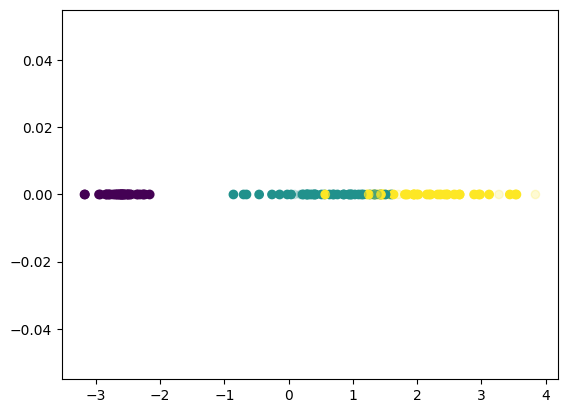

In [7]:
# PCA to only one component
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the data
plt.scatter(X_train_pca, np.zeros_like(X_train_pca), c=Y_train, cmap='viridis')
plt.scatter(X_test_pca, np.zeros_like(X_test_pca), c=Y_test, cmap='viridis', alpha=0.2)

In [11]:
# Binary decision tree
from sklearn import tree

X_train = X_train_pca
X_test = X_test_pca
max_depth =  3

clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X_train, Y_train)

# Print classification accuracy
print('Train accuracy:', clf.score(X_train, Y_train))

Y_pred = clf.predict(X_test)
accuracy = np.mean(Y_pred == Y_test)
print('Accuracy Total:', accuracy)

# Accuracy per class
for i in range(3):
    accuracy = np.mean(Y_pred[Y_test == i] == Y_test[Y_test == i])
    print('Accuracy Class', i, ':', accuracy)

Train accuracy: 0.9416666666666667
Accuracy Total: 0.9666666666666667
Accuracy Class 0 : 1.0
Accuracy Class 1 : 0.8888888888888888
Accuracy Class 2 : 1.0


[Text(0.375, 0.875, 'x[0] <= -1.513\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[0] <= 1.187\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'x[0] <= 0.562\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(0.375, 0.125, 'gini = 0.124\nsamples = 15\nvalue = [0, 14, 1]'),
 Text(0.75, 0.375, 'x[0] <= 1.616\ngini = 0.236\nsamples = 44\nvalue = [0, 6, 38]'),
 Text(0.625, 0.125, 'gini = 0.457\nsamples = 17\nvalue = [0, 6, 11]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

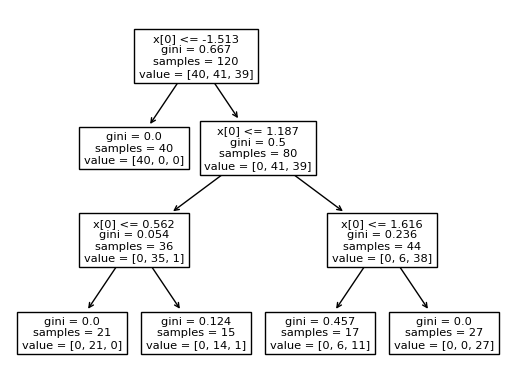

In [12]:
tree.plot_tree(clf)